# Problem Set 0: Introduction to training neural networks

<a name='section_1'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">1. Why use Jupyter notebooks?</h2>

Jupyter notebooks are a very popular tool used by scientists who work with data. They allow for text comments (i.e. Markdown and/or LaTeX) to co-exist alongside cells of Python code and the output of that code (plots, text, etc.). While they have their drawbacks (see the talk linked below), notebooks are still often used in practice to develop ML methods, even if eventually the model components are put into standalone Python scripts (see e.g. [this template](https://github.com/drivendataorg/cookiecutter-data-science)).

- You can add your own cells using the `+` button up at the top, or by hitting `ESC` then `b`. 
- Use the dropdown in the menu up top to select whether your given cell is `Markdown` or `Code`.

I recommend using a local (or remote) install of `Jupyter Lab` as your main interface, which will allow you to open multiple notebooks, Terminal windows, and even code editing pages in a single browser tab. `Google Colab` is an alternative option, though (in my opinion) this has several disadvantages that make it tedious and limited in practice for any compute-intensive research applications. 

Further reading: 
- [What is a Jupyter notebook?](https://docs.jupyter.org/en/latest/)
- ["I don't like notebooks."](https://youtu.be/7jiPeIFXb6U?si=_JOftBz5CIp5Ve73), a legendary and hilarious take against notebooks by Joel Grus

<a name='section_2'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">2. Installing & importing software packages</h2>

### The import command

In order to use any of the software packages that extend Python functionality, it is first necessary to add that package using the `import` command. (Note: You may see the terms "package," "library," and "module" thrown around; all of these refer to code meant to be reused.)

When importing a package, you can specify an alternative name to use when calling the library functions. For this example, we will use the `numpy` package and specify the alias `np` when importing it `import numpy as np` and then use `np.function`.

The most foolproof way of including a package like `numpy` is to start every code file that uses it with the command `import numpy as np`. However, when using Jupyter notebooks, either locally or through Colab, it is only necessary to run this command *once* per session. 

### Installing software packages

In data science, we often use external packages that interface with Python code to give it broader abilities. Usually, you have to do this manually using tools including: 
- `pip`
- `conda`
- `uv`

Everyone develops their own preferences for how to do package management, and you're encouraged to try out a few of these tools in your own time to see what you like best. For this class, I'm assuming you've already used `conda` to create a custom environment to load this notebook. 

Have you activated the proper Jupyter kernel so that your notebook can "see" the packages you've installed in your `conda` environment? Try out the following cell -- if it fails, then your answer is probably "no":

In [2]:
import numpy as np

Let's make sure that our notebook can see our custom `conda` environment. First, we'll need to make sure we've installed `ipykernel`:

In [3]:
# note: using %pip or %conda is the recommended way to install packages directly from the notebook
%pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


Now we can run the following (note that my environment is named `phys_805`, but you should change this to whatever you named your `conda` environment):

In [7]:
! python -m ipykernel install --user --name phys_805 --display-name "phys_805"

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Installed kernelspec phys_805 in /Users/mpettee/Library/Jupyter/kernels/phys_805


Does the kernel show up in the drop-down list in the upper right corner? Try refreshing your browser -- how about now? 

Once you've selected the kernel from the drop-down list, try running the following cell again:

In [8]:
import numpy as np

If that didn't work, make sure you've installed `numpy` in your `conda` env:

In [9]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [11]:
# note that you can also install multiple packages in the same line
%pip install matplotlib pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


<h3>Partial imports</h3>

Sometimes you only need a subset of the functions in a library. In that case, it will be faster to restrict what is imported. For example, `import scipy.stats` will only import the statistical functions in the SciPy library, for which you would call `scipy.stats.function`.

<a name='section_3'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">3. Working with numpy arrays</h2>

<h3>Overview</h3>

Data science algorithms very often consist primarily of a variety of matrix computations, so we'll need a way to efficiently work with matrices.

The NumPy software package in Python does a variety of numerical matrix computations using very compact and efficient code for handling arrays of data. It is used extensively in many fields requiring numerical analysis, and will be used extensively in this course. You can find general documentation on `numpy` <a href="https://docs.scipy.org/doc/numpy/user/quickstart.html" target="_blank">here</a>.

As mentioned above, we will use the convention of abbreviating the name `numpy` to the shorthand `np` via the command `import numpy as np`. Then, we can use `np.function` throughout our code.

### Lists vs. arrays 
The fundamental data type in `numpy` is the multidimensional array, and arrays are usually generated from a nested list of values using the `np.array` command. Every `array` has a `shape` attribute which is a list of the sizes of the various dimensions. As described in more detail below, these sizes are specified when an array is created using nested square brackets.

In this class, we will mostly use one- and two-dimensional arrays. To create a `numpy` array from a 1D list of numbers, we use the following (notice the difference in the data types):

In [ ]:
import numpy as np

my_list = [1, 2, 3, 4, 5]
my_list_type = type(my_list).__name__

my_array = np.array(my_list)
my_array_type = type(my_array).__name__

print(f'This is a {my_list_type}: {my_list}')
print(f'...but this is an {my_array_type}: {my_array}')

Of course, you can also generate numpy arrays without converting a list to a numpy array. Many built-in `numpy` functions do this. For instance:

In [16]:
x = np.linspace(start=0, stop=7, num=5) # 5 points, evenly spaced, ranging from 0 to 7

print('print x:', x)
print('type:', type(x).__name__)
print('shape:', x.shape)

print x: [0.   1.75 3.5  5.25 7.  ]
type: ndarray
shape: (5,)


In [ ]:
y = np.arange(5) # integers going up to 5 (note that it starts counting at 0!)

print('print y:', y)
print('type:', type(y).__name__)
print('shape:', y.shape)

<h3>Operations on of Arrays</h3>

Note that it is often conventional to use 2D arrays to represent both matrices and vectors.  Although the notations `[[1,2,3]]` and `[1,2,3]` look very similar, some `numpy` functions behave differently depending on which format you use. The first has two dimensions (it's a list of lists), while the second has only one (it's a single list). Using only 2D arrays for both matrices and vectors gives us predictable results from 'numpy' operations.

Using 2D arrays for matrices is clear enough, but what about column and row vectors? We will represent a column vector as a $d\times 1$ array and a row vector as a $1\times d$
array (where we are using the standard "$\#$ of rows $\times$ $\#$ of columns" notation).

**Column Vector**

For example, we will represent the three-element column vector,

$$
x31 =
\left[
\begin{array}{c}
1 \\
5 \\
3 \\
\end{array}
\right],
$$

as a $ 3 \times 1 $ `numpy` array which can be generated using (take note of the "double" brackets):

$~~~$<tt> x31 = np.array([[1],[5],[3]]), </tt>

<br>

**Row Vector**

The three-element row vector:

$$
x13 =
\left[ 1, 5, 3 \right],
$$

is a $ 1 \times 3 $ `numpy` array which can be generated using (take note of the different arrangement of "double" brackets here):

$~~~$<tt> x13 = np.array([[1,5,3]]), </tt>


<br>

**Transpose**

The row vector above can also be generated by transposing the $ 3 \times 1 $ array:

$~~~$<tt> x13 = np.transpose(np.array([[1,5,3]]),</tt>

A more compact notation is to use the array attribute <tt> .T </tt>, as in

$~~~$<tt> x13 = np.array([[1,5,3]]).T </tt>


**NOTE:** The transpose operation does NOT transform the shape of a 1D array with shape (N,). For instance, see what happens in the code below if we try `x3 = np.array([1,5,3]).T`.


<br>

### Try running the code below:

In [ ]:
x31 = np.array([[1],[5],[3]])
x13 = np.array([[1,5,3]])
x3 = np.array([1,5,3])

print('x31')
print(x31)
print()

print('x13')
print(x13)
print()

print('x3')
print(x3)
print()

print('x13.T (should equal x31)')
print(x13.T)
print()

print('x3.T (will not equal x31)')
print(x3.T)
print()

<h3>Useful Functions</h3>

Some of the functions and features you should be familiar with for this course are listed below with links to the corresponding documentation. Note that the page pointed to by each link also describes other related functions. For example, the link for `np.ones` references other functions such as `np.zeros`.

* <tt><a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html" target="_blank">np.array</a></tt> Create an array.
* <tt><a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html" target="_blank">np.transpose</a></tt> (and the equivalent method `a.T`) Take the transpose of an array.
* <tt><a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html" target="_blank">np.ndarray.shape</a></tt> Return a list of the dimension sizes of an array.
* <tt><a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html" target="_blank">np.dot</a></tt> (and the equivalent method `a.dot(b)`) Does a matrix multiplication of the two arrays. This product of two matrices is sometimes denoted  `a @ b`. This notation should not be confused with the term "dot product", which can be used to denote $a^T b$. 
* <tt><a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html" target="_blank">np.linalg.inv</a></tt> Find the inverse of an array (only possible for square arrays).
* <tt><a href="https://numpy.org/doc/stable/reference/generated/numpy.vstack.html" target="_blank">np.vstack</a></tt> Combines arrays so that the added arrays become new rows in the first array.
* <tt><a href="https://numpy.org/doc/stable/reference/generated/numpy.ones.html" target="_blank">np.ones</a></tt> Creates an array filled with "1"s.
* <tt><a href="https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html" target="_blank">np.sqrt</a></tt> Returns an array containing elements which are the square root of the elements in the original array.
* Elementwise operators for matrix arithmetic: `+`, `-`,  `*`, and  `/`. 

<h3>Array Shapes</h3>

Let `A` be a $4\times 2$ numpy array, `B` be a $4\times 3$ array, and `C` be a $4\times 1$ array.  For each of the following expressions, indicate the shape (i.e., the dimensions) of the result as a tuple of integers (<b>recall python tuples use parentheses, not square brackets, which are for lists, and a tuple with just one item  <tt>x</tt> in it is written as <tt>(x,)</tt> with a comma</b>). If the expression is invalid, submit the python string 'none' (lower case and including the single quotes).

For example,

* If the result array was `[45, 36, 75]`, the shape is `(3,)`
* If the result array was `[[1,2,3],[4,5,6]]`, the shape is `(2,3)`

**Hint: If you get stuck, code and run these expressions (with array values of your choosing), then print out the shape using `A.shape`**
<br>

<h3>Slicing & dicing</h3>

The shape of the resulting array is different depending on if you use indexing or slicing.

<b>Indexing</b> refers to selecting one particular element of an array by using single numbers (the indices) to specify the corresponding row and column.

Note that Python uses **zero-indexing**, which means that the first rows and first column are denoted 0, not 1. This is different from R and MATLAB. Because of this counting convention, indexing the 3rd row and 4th column of a matrix `B` would be written `B[2,3]`.

Negative numbers are used as indices which count from the end of a row or column. However, because of the difficulty in software of distinguishing `+0` and `-0`, there is no negative equivalent of zero-indexing, so `-1` indicates the last row or column. For example, `B[-1,-1]` indicates the bottom right element (last row and column) in a matrix.

<b>Slicing</b> refers to selecting a subset of the array by specifying a range of indices. The notation used for ranges is  `n:m`, where `n` is the index of the initial row or column (with the counting again starting at zero). Contrary to what you might expect, `m` is **not** the index of the final row or column. Instead, that index is `m-1`. So, selecting the 3rd through 4th row and 5th through 7th column of an array would be denoted `A[2:4,4:7]`. Leaving the end of the range blank, for example `1:`, denotes that the range ends at the last row or column in the matrix. Similarly, you can leave the first index blank to indicate a range that starts at the first row or column. This latter option is not really needed since one can start the indicated range with `0:` for any matrix. The output of slicing is another matrix but with a different number of rows and/or columns than the original.

Note that you can combine indexing and slicing by selecting a single index for either the row or column and a range for the other one. In this case, the output is a 1D vector, either a single row or a single column.


If you're unfamiliar with these terms, you can also look at the official numpy documentation <a href="https://numpy.org/doc/stable/reference/arrays.indexing.html" target="_blank">here</a>.


<h3>Practice</h3>

In the following questions, let

<pre>x = np.array([[5,7,10,14],[2,4,8,9]])</pre>

Tell us what the output would be for each of the following expressions. Use brackets `[]` as necessary. If the operation is invalid, submit the python string `'none'`.

<br>

<a name='problem_x'></a> 
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #1f77b4; color: #1f77b4;">Problem: Indexing </span>

In [21]:
x = np.arange(1, 17).reshape(4, 4)
# x =
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]
#  [13 14 15 16]]

### fill me in:
### Slice the top-left 2×2 block into top_left
### Slice the last column into last_col
### Slice every other row into every_other_row

print("top_left =\n", top_left)
print("last_col =", last_col)
print("every_other_row =\n", every_other_row)

### Expected outputs:
### top_left = [[1 2]
###             [5 6]]
### last_col = [ 4  8 12 16]
### every_other_row = [[ 1  2  3  4]
###                    [ 9 10 11 12]]

top_left =
 [[1 2]
 [5 6]]
last_col = [ 4  8 12 16]
every_other_row =
 [[ 1  2  3  4]
 [ 9 10 11 12]]


<a name='problem_stacking'></a> 
### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #1f77b4; color: #1f77b4;">Problem: Stacking & shaping arrays </span>

In [20]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

### fill me in: 
vstacked = np.vstack([a,b])
hstacked = np.hstack([a,b])

### stack `a` and `b` vertically into a 2×3 array called `vstacked`
### stack `a` and `b` horizontally into a 1×6 array called `hstacked`

print("vstacked: \n", vstacked)
print("hstacked: \n", hstacked)

print("vstacked shape: ", vstacked.shape)
print("hstacked shape: ", hstacked.shape)

### Expected shapes:
### vstacked.shape == (2, 3)
### hstacked.shape == (6,)

vstacked: 
 [[1 2 3]
 [4 5 6]]
hstacked: 
 [1 2 3 4 5 6]
vstacked shape:  (2, 3)
hstacked shape:  (6,)


<a name='section_4'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">4. Plotting</h2>

Let's configure our plotting settings so that our plots look nice.

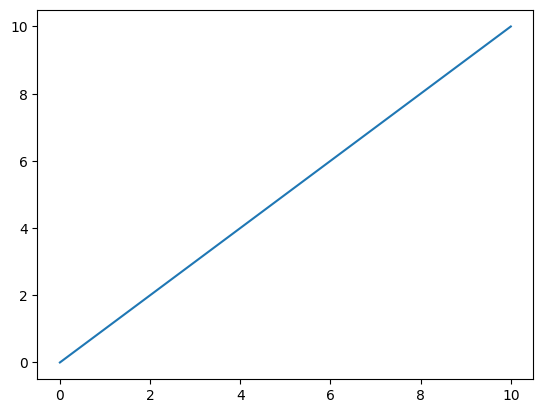

In [13]:
import matplotlib.pyplot as plt

x = np.linspace(0,10,10)
y = np.linspace(0,10,10)
plt.plot(x,y)
plt.show()

This doesn't look very high-resolution. We can fix this by seeting our plotting defaults:

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# set plot resolution
%config InlineBackend.figure_format = 'retina'

# set default figure size
plt.rcParams['figure.figsize'] = (9,6)

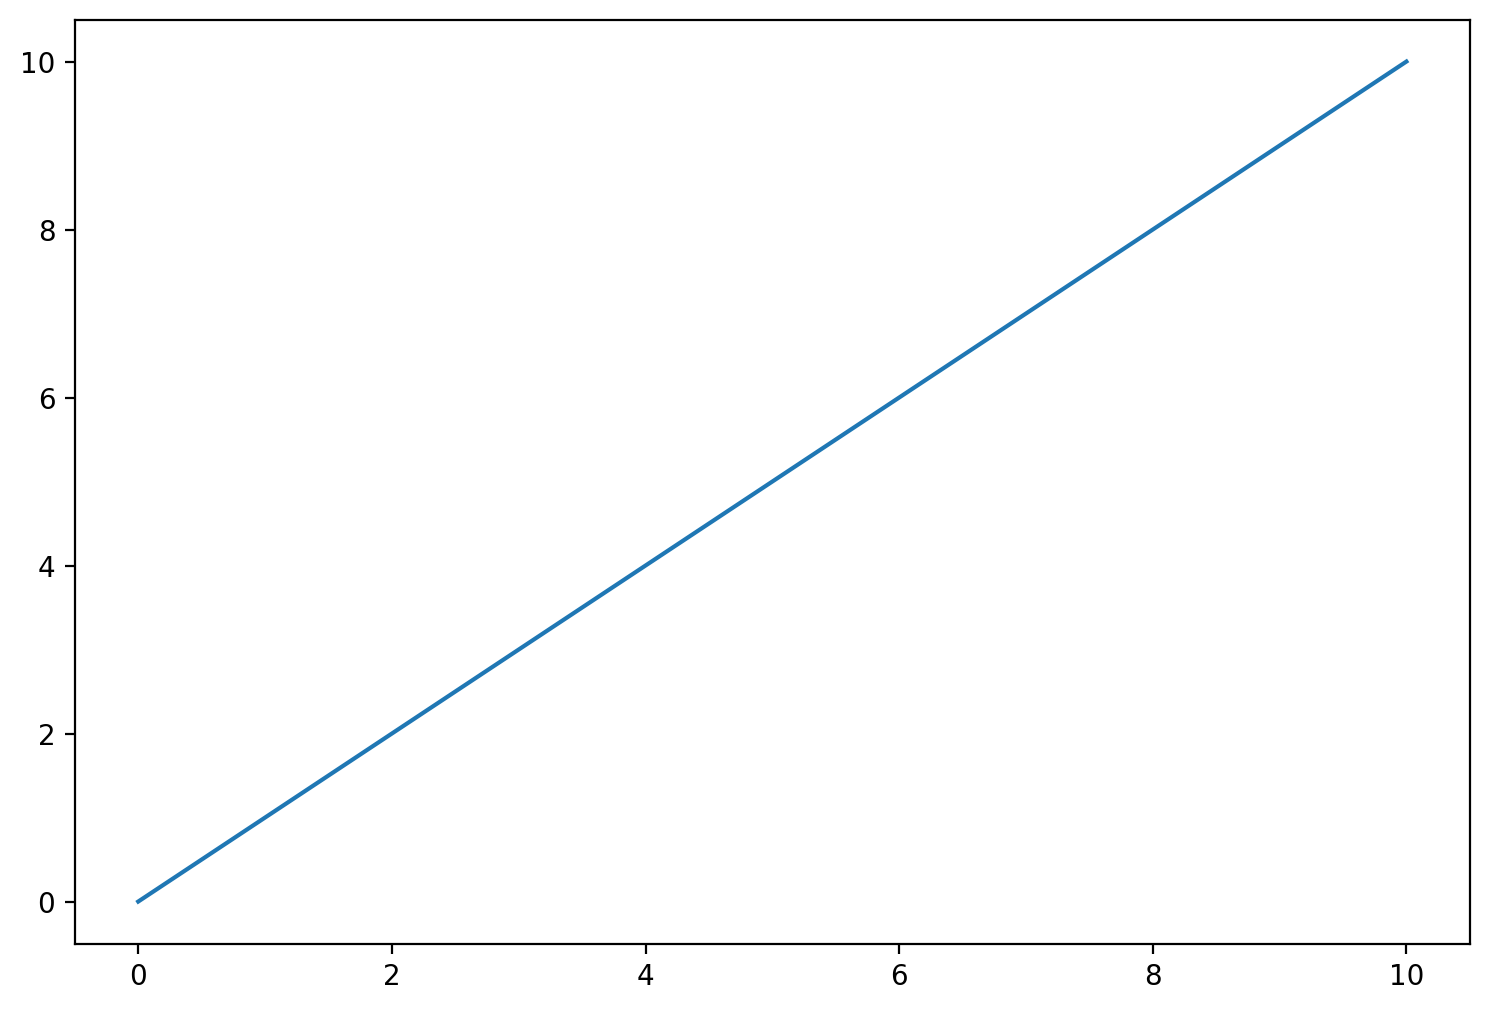

In [15]:
x = np.linspace(0,10,11)
y = np.linspace(0,10,11)
plt.plot(x,y)
plt.show()

What else is missing from the plot above? Spend some time making it look better.

<a name='section_5'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">5. Setting up a training dataset</h2>

Okay, now that we've covered some data science basics, let's play with some (fake) data!

<a name='section_6'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">6. Defining a neural network model</h2>

<a name='section_7'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">7. Training</h2>

Let's play with tracking our model training using `wandb`.

https://docs.wandb.ai/guides/track/jupyter/ 

In [22]:
%pip install wandb -qqq

Note: you may need to restart the kernel to use updated packages.


In [25]:
import wandb
wandb.login()

True

In [ ]:
wandb.init(
    project="phys-805-pset-0",
    config={
        "batch_size": 128,
        "learning_rate": 0.01,
        "dataset": "gaussians",
    },
)

<a name='section_8'></a>
<h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #1f77b4">8. Evaluating model performance</h2>

In [ ]:
- define a baseline
- evaluate on the test set

(After this... UDL notebooks?)